# Experiments on real-world data

In [8]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pickle
import torch

from matplotlib import pyplot as plt
%matplotlib inline

from utils.train_medical import run_medical_experiments
from utils.results import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


To obtain the results as presented in the paper, run the following three sections.

## MIMIC-III dataset

In [ ]:
for baseline in ['CFRNN', 'AdaptiveCFRNN', 'QRNN', 'DPRNN']:
    for seed in range(1, 5):
        run_medical_experiments(dataset='mimic', 
                                baseline=baseline,
                                save_model=True, 
                                save_results=True,
                                seed=seed)

Training CFRNN
Epoch: 0	Train loss: 182.88025174822127
Epoch: 50	Train loss: 58.05814906529018
Epoch: 100	Train loss: 59.47126906258719
Epoch: 150	Train loss: 72.10973262786865
Epoch: 200	Train loss: 56.751835686819895
Epoch: 250	Train loss: 58.04673767089844
Epoch: 300	Train loss: 57.50358772277832
Epoch: 350	Train loss: 57.81450939178467
Epoch: 400	Train loss: 58.17083168029785
Epoch: 450	Train loss: 58.1093373979841
Epoch: 500	Train loss: 63.71995939527239
Epoch: 550	Train loss: 58.66719668252127
Epoch: 600	Train loss: 57.422222818647114
Epoch: 650	Train loss: 57.164130619594026
Epoch: 700	Train loss: 59.20651762826102
Epoch: 750	Train loss: 60.78845092228481
Epoch: 800	Train loss: 56.57934761047363
Epoch: 850	Train loss: 57.23169136047363
Epoch: 900	Train loss: 72.69065284729004
Epoch: 950	Train loss: 56.816522870744976
Training CFRNN
Epoch: 0	Train loss: 171.21442031860352
Epoch: 50	Train loss: 53.18712724958147
Epoch: 100	Train loss: 30.109013898032053
Epoch: 150	Train loss: 27.7

In [13]:
for baseline in ['CFRNN', 'AdaptiveCFRNN', 'QRNN', 'DPRNN']:
    print(baseline)
    coverages_mean, coverages_std = get_joint_medical_coverages(baseline, 'mimic', seeds=range(5))
    
    print('{:.1f} \\(\\pm\\) {:.1f}\\%'.format(coverages_mean, coverages_std))
    print()

CFRNN
93.0 \(\pm\) 0.0\%

AdaptiveCFRNN
92.8 \(\pm\) 0.0\%

QRNN
88.6 \(\pm\) 0.0\%

DPRNN
49.4 \(\pm\) 0.0\%



In [ ]:
for baseline in ['CFRNN', 'DPRNN', 'QRNN']:
    print(baseline)
    widths_mean, widths_std = get_medical_interval_widths(baseline, 'mimic', seeds=range(5))
    
    print(widths_mean)
    print(widths_std)
    print()

## EEG dataset

In [ ]:
for baseline in ['CFRNN', 'AdaptiveCFRNN', 'QRNN', 'DPRNN']:
    for seed in range(5):
        run_medical_experiments(dataset='eeg', 
                                baseline=baseline,
                                save_model=True, 
                                save_results=True,
                                seed=seed)

## COVID-19 dataset

In [ ]:
for baseline in ['CFRNN', 'AdaptiveCFRNN', 'QRNN', 'DPRNN']:
    for seed in range(5):
        run_medical_experiments(dataset='covid', 
                                baseline=baseline,
                                save_model=True, 
                                save_results=True,
                                seed=seed)

**Independent coverage**

In [ ]:
for baseline in ['DPRNN', 'QRNN', 'CPRNN']:
    independent_coverages = covid_results[baseline]['Mean independent coverage']
    print(independent_coverages)
    print('[{:.1f}\\%, {:.1f}\\%]'.format(independent_coverages.min() * 100, independent_coverages.max() * 100))
    print()

**Mean absolute error**

In [ ]:
for baseline in ['DPRNN', 'QRNN', 'CPRNN']:
    errors = covid_results[baseline]['Errors']
    print(errors.mean(axis=0)) 
    print('{:.2f} \\(\\pm\\) {:.2f}'.format(errors.mean(), errors.std()))
    print()

**Interval widths**

In [ ]:
for baseline in ['DPRNN', 'QRNN', 'CPRNN']:
    print(covid_results[baseline]['Mean confidence interval widths'])
    print(covid_results[baseline]['Mean confidence interval widths'].mean(), covid_results[baseline]['Mean confidence interval widths'].std())
    print()

## Ablation: Uncorrected calibration scores

The results have been obtained by running:

```python
uncorrected_mimic_results = run_medical_experiments(retrain=True, dataset='mimic', baselines=['CPRNN'], correct_conformal=False)
uncorrected_eeg_results = run_medical_experiments(retrain=True, dataset='eeg', baselines=['CPRNN'], correct_conformal=False)
uncorrected_covid_results = run_medical_experiments(retrain=True, dataset='covid', baselines=['CPRNN'], correct_conformal=False)
```

The following will load the saved results.

#### MIMIC-III

In [6]:
uncorrected_mimic_results = run_medical_experiments(retrain=False, dataset='mimic', baselines=['CPRNN'], correct_conformal=False)

In [7]:
uncorrected_mimic_results['CPRNN']['Mean joint coverage']

0.878000020980835

In [8]:
independent_coverages = uncorrected_mimic_results['CPRNN']['Mean independent coverage']
print('[{:.1f}\\%, {:.1f}\\%]'.format(independent_coverages.min() * 100, independent_coverages.max() * 100))

[89.0\%, 89.8\%]


#### EEG

In [9]:
uncorrected_eeg_results = run_medical_experiments(retrain=False, dataset='eeg', baselines=['CPRNN'], correct_conformal=False)

In [10]:
uncorrected_eeg_results['CPRNN']['Mean joint coverage']

0.5795312523841858

In [11]:
independent_coverages = uncorrected_eeg_results['CPRNN']['Mean independent coverage']
print('[{:.1f}\\%, {:.1f}\\%]'.format(independent_coverages.min() * 100, independent_coverages.max() * 100))

[85.8\%, 90.6\%]


#### COVID-19

In [12]:
uncorrected_covid_results = run_medical_experiments(retrain=False, dataset='covid', baselines=['CPRNN'], correct_conformal=False)

In [13]:
uncorrected_covid_results['CPRNN']['Mean joint coverage']

0.574999988079071

In [14]:
independent_coverages = uncorrected_covid_results['CPRNN']['Mean independent coverage']
print('[{:.1f}\\%, {:.1f}\\%]'.format(independent_coverages.min() * 100, independent_coverages.max() * 100))

[77.5\%, 98.8\%]


## Long horizon analysis

### EEG

In [14]:
import torch
import numpy as np

import matplotlib.pyplot as plt

In [45]:
widths = {}
for rnn_model in ['LSTM', 'RNN', 'GRU']:
    model = torch.load('saved_models/eeg_CPRNN_{}.pt'.format(rnn_model))
    n_train = 15360
    
    ws = []
    alphas = np.arange(100) * 0.01
    for alpha in alphas:
        corrected_alpha = alpha / model.horizon
        corrected_critical_calibration_scores = torch.tensor([[
                torch.quantile(
                    position_calibration_scores,
                    q=1 - corrected_alpha * n_train / (n_train + 1))
                for position_calibration_scores in feature_calibration_scores]
                for feature_calibration_scores in model.calibration_scores]).T
        ws.append(corrected_critical_calibration_scores.flatten().tolist())
    ws = np.array(ws)
    ws = ws * 2
    widths[rnn_model] = ws

In [46]:
def compute_valid_horizons(threshold_width=15):
    valid_horizons = {}
    for rnn_model in ['LSTM', 'RNN', 'GRU']:    
        T = []
        ws = widths[rnn_model]
        for i, _ in enumerate(alphas):
            t = 0
            while t < ws.shape[1] and ws[i, t] < threshold_width:
                t += 1
            T.append(t)
        valid_horizons[rnn_model] = np.array(T)
    return valid_horizons

In [15]:
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
plt.rcParams.update({'axes.labelsize': 12})

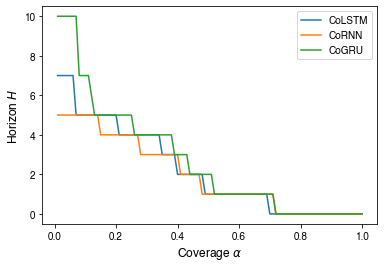

In [49]:
threshold_width = 25
valid_horizons = compute_valid_horizons(threshold_width)
for rnn_model in valid_horizons.keys():
    plt.plot(1-alphas, valid_horizons[rnn_model], label='Co{}'.format(rnn_model))
plt.xlabel('Coverage $\\alpha$')
plt.ylabel('Horizon $H$')
plt.legend()
plt.show()

In [30]:
widths = {}
for rnn_model in ['LSTM', 'RNN', 'GRU']:
    model = torch.load('saved_models/covid_CPRNN_{}.pt'.format(rnn_model))
    n_train = 15360
    
    ws = []
    alphas = np.arange(100) * 0.01
    for alpha in alphas:
        corrected_alpha = alpha / model.horizon
        corrected_critical_calibration_scores = torch.tensor([[
                torch.quantile(
                    position_calibration_scores,
                    q=1 - corrected_alpha * n_train / (n_train + 1))
                for position_calibration_scores in feature_calibration_scores]
                for feature_calibration_scores in model.calibration_scores]).T
        ws.append(corrected_critical_calibration_scores.flatten().tolist())
    ws = np.array(ws)
    ws = ws * 2
    widths[rnn_model] = ws